In [38]:
library(tidyverse)
library(repr)
library(tidymodels)
library(themis)
library(yardstick)

For this model, we will only be using played_hours as the sole predictors and will be including players with 0 played_hours in order to see how including players with no played hours will affect the model's accuracy. Bsefore we start with building the model, we have to look at the number of players for each player skill level as if there is a class imbalance (Ex. more amateurs than pros), nearest neighbors will be biased (classify amateurs more since there are less pros).  

In order to look at the number of players for each skill level, we decided to create a bar graph with the number of players on the x axis and skill level on the y axis.

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,NA,NA
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,NA,NA
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,NA,NA


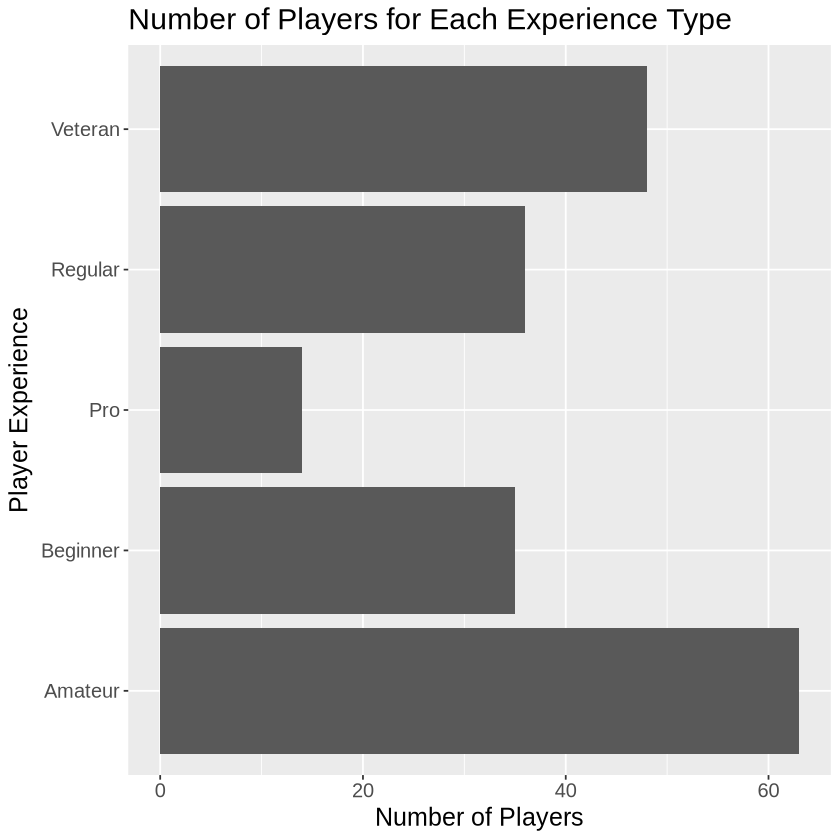

In [39]:
players <- read_csv("https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz")
players
ggplot(players, aes(y = experience)) +
geom_bar(stat = "count") +
labs(x = "Number of Players", y = "Player Experience", title = "Number of Players for Each Experience Type") +
theme(text = element_text(size = 15))

It is evident that there is a class inbalance since there are much less pros compared to all other classes. This means that we must first do some data preprocessing to the training data before we can build a model. To even out the distribution of the player experience, we will use the step_upsample function in the recipe, prep it, and bake it onto the training data.

It also important to note that from the table, it looks like experience should be a factor variable instead of a string (or chr) which means that the as_factor function needs to be used. 

In [40]:
set.seed(1)
players <- players |> 
mutate(experience = as.factor(experience))

gen_k_vals <- tibble(neighbors = seq(from = 1, to = 91, by = 10))

hours0_split <- initial_split(players, prop = 0.75, strata = experience)
hours0_train <- training(hours0_split)
hours0_test <- testing(hours0_split)

summary(hours0_train$experience)

hours0_train <- recipe(experience ~ played_hours, data = hours0_train) |>
step_upsample(experience, over_ratio = 1, skip = FALSE) |>
prep() |>
bake(hours0_train)
summary(hours0_train$experience)

Amateur Beginner      Pro  Regular  Veteran 
      47       26       10       27       35

Amateur Beginner      Pro  Regular  Veteran 
      47       47       47       47       47

From the summary function, we can see that the training data now has an even distribution of Amateurs, Beginners, Pros, Regulars, and Veterans. Now we can finally move onto building the model.

To find the best K value for this model we decided to first use a large general k values (1-91 by increments of 10) and then tune the model again with K values around the best K in order to get an accurate result for the best nearest neighbors. We will create a new recipe (since the first recipe was mainly used for upsampling) and a model and then finally test for general K values first. 

In [41]:
set.seed(1)
gen_k_vals <- tibble(neighbors = seq(from = 1, to = 91, by = 10))
hours0_vfold <- vfold_cv(hours0_train, v = 10, strata = experience)

hours0_recipe <- recipe(experience ~ played_hours, data = hours0_train) 

hours0_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
set_engine("kknn") |>
set_mode("classification")

hours0_results <- workflow() |>
  add_recipe(hours0_recipe) |>
  add_model(hours0_tune) |>
  tune_grid(resamples = hours0_vfold, grid = gen_k_vals) |>
  collect_metrics() |>
  filter(.metric == "accuracy")
hours0_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.372,10,0.02640707,Preprocessor1_Model01
11,accuracy,multiclass,0.318,10,0.03352611,Preprocessor1_Model02
21,accuracy,multiclass,0.307,10,0.02852095,Preprocessor1_Model03
31,accuracy,multiclass,0.301,10,0.03535377,Preprocessor1_Model04
41,accuracy,multiclass,0.292,10,0.03268707,Preprocessor1_Model05
51,accuracy,multiclass,0.288,10,0.02847221,Preprocessor1_Model06
61,accuracy,multiclass,0.282,10,0.01730767,Preprocessor1_Model07
71,accuracy,multiclass,0.260,10,0.02231093,Preprocessor1_Model08
81,accuracy,multiclass,0.215,10,0.01995829,Preprocessor1_Model09


Now that we know the best K value lies within K = 1 to K = 11 (since K = 1 has the highest accuracy), we will tune the model again but with different values of K.

In [42]:
set.seed(1)
k_vals <- tibble(neighbors = seq(from = 1, to = 11, by = 1))

hours0_results <- workflow() |>
  add_recipe(hours0_recipe) |>
  add_model(hours0_tune) |>
  tune_grid(resamples = hours0_vfold, grid = k_vals) |>
  collect_metrics() |>
  filter(.metric == "accuracy")
hours0_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.372,10,0.02640707,Preprocessor1_Model01
2,accuracy,multiclass,0.389,10,0.02557994,Preprocessor1_Model02
3,accuracy,multiclass,0.389,10,0.03560431,Preprocessor1_Model03
4,accuracy,multiclass,0.385,10,0.03081306,Preprocessor1_Model04
5,accuracy,multiclass,0.385,10,0.03804237,Preprocessor1_Model05
6,accuracy,multiclass,0.372,10,0.03758841,Preprocessor1_Model06
7,accuracy,multiclass,0.349,10,0.03900000,Preprocessor1_Model07
8,accuracy,multiclass,0.346,10,0.03771825,Preprocessor1_Model08
9,accuracy,multiclass,0.346,10,0.03818668,Preprocessor1_Model09


It is evident that K = 2 and K = 3 are the best K values since thy are tied for the highest accuracy. We will choose K = 3 instead of K = 2 since K = 3 seems to be more stable as increasing K values from K = 3 barely decreases the accuracy at all. 

Now with our K value, we can finally create the model that includes K = 3 as the nearest neighbors and evaluate its accuracy using the test dataset.

In [46]:
set.seed(1)

hours0_model <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
set_engine("kknn") |>
set_mode("classification")

hours0_predict <- workflow() |>
  add_recipe(hours0_recipe) |>
  add_model(hours0_model) |>
  fit(data = hours0_train) |>
  predict(hours0_test) |>
  bind_cols(hours0_test)
                                 
hours0_accuracy <- hours0_predict |>
     metrics(truth = experience, estimate = .pred_class) |>
     filter(.metric == "accuracy")
hours0_accuracy

hours0_precision <- hours0_predict |>
    precision(truth = experience, estimate = .pred_class, event_level="first")
hours0_precision

hours0_recall <- hours0_predict |>
    recall(truth = experience, estimate = .pred_class, event_level="first")
hours0_recall

hours0_matrix <- hours0_predict |>
    conf_mat(truth = experience, estimate = .pred_class)
hours0_matrix

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.2156863


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,macro,0.1540351


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,macro,0.1501068


          Truth
Prediction Amateur Beginner Pro Regular Veteran
  Amateur        9        8   3       7      11
  Beginner       2        0   0       1       0
  Pro            2        0   0       0       0
  Regular        1        1   1       1       1
  Veteran        2        0   0       0       1